<a href="https://colab.research.google.com/github/Mr-Faizan-Asim/ML-DL-Solutions/blob/master/DiaXAi_MODEL_%2B_XAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install Kaggle API
!pip install -q kaggle

# Upload the Kaggle API key to authenticate (you need to upload your 'kaggle.json' file first)
from google.colab import files
files.upload()  # This will prompt you to upload 'kaggle.json'

# Create the Kaggle folder and move the uploaded file there
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

# Set permissions for the API key
!chmod 600 ~/.kaggle/kaggle.json


mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [2]:
# Download the dataset
!kaggle datasets download -d uciml/pima-indians-diabetes-database


Dataset URL: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
License(s): CC0-1.0
  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 15.8MB/s]


In [3]:
# Download the dataset
!kaggle datasets download -d uciml/pima-indians-diabetes-database


Dataset URL: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
License(s): CC0-1.0
pima-indians-diabetes-database.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models

# Load PIMS dataset (adjust the path to your dataset)
# Assuming the dataset has columns like 'Age', 'Gender', 'BloodPressure', 'Insulin', 'Glucose', 'BMI', 'Outcome' (1 for diabetic, 0 for non-diabetic)
data = pd.read_csv('diabetes.csv')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.5738 - loss: 0.6757 - val_accuracy: 0.7468 - val_loss: 0.6015
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7451 - loss: 0.5658 - val_accuracy: 0.7662 - val_loss: 0.5515
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7353 - loss: 0.5325 - val_accuracy: 0.7532 - val_loss: 0.5277
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7582 - loss: 0.4957 - val_accuracy: 0.7532 - val_loss: 0.5107
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7904 - loss: 0.4679 - val_accuracy: 0.7662 - val_loss: 0.5037
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7531 - loss: 0.4743 - val_accuracy: 0.7597 - val_loss: 0.4995
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7904 - loss: 0.4502 - val_accuracy: 0.7662 - val_loss: 0.5012
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7726 - loss: 0.4494 - val_accuracy: 0.7532 - val_loss

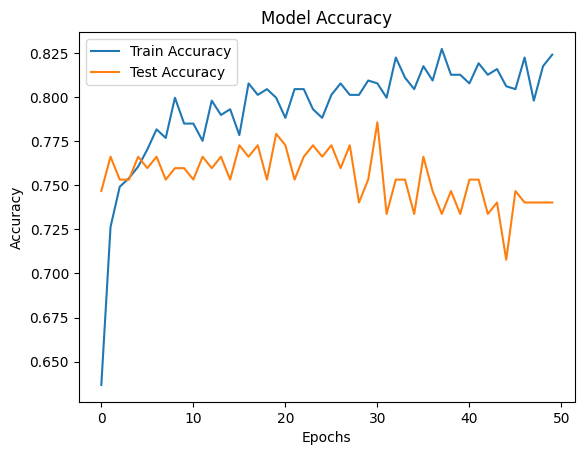

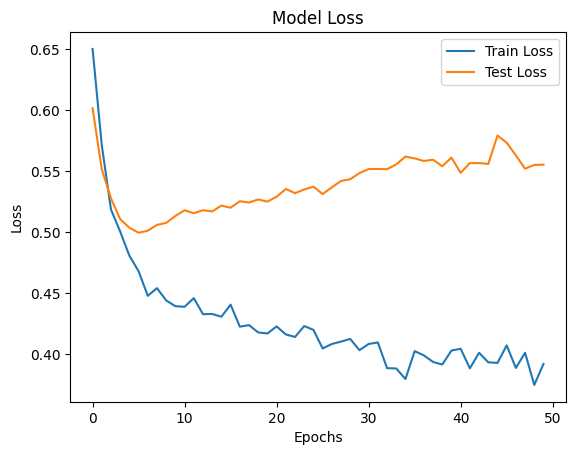

In [5]:

# Split data into features and labels
X = data.drop('Outcome', axis=1)  # All columns except 'Outcome'
y = data['Outcome']  # Target column indicating diabetes or not

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data to have a mean of 0 and a standard deviation of 1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Create the deep learning model using Keras
model = models.Sequential()

# Input layer
model.add(layers.InputLayer(input_shape=(X_train.shape[1],)))

# Hidden layers
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))  # Dropout layer to reduce overfitting
model.add(layers.Dense(32, activation='relu'))

# Output layer (binary classification)
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc * 100:.2f}%")

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.4585 - loss: 0.7301 - val_accuracy: 0.7532 - val_loss: 0.6178
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7578 - loss: 0.5769 - val_accuracy: 0.7727 - val_loss: 0.5615
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7738 - loss: 0.5194 - val_accuracy: 0.7792 - val_loss: 0.5324
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7872 - loss: 0.4872 - val_accuracy: 0.7857 - val_loss: 0.5147
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8006 - loss: 0.4509 - val_accuracy: 0.7857 - val_loss: 0.5070
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7559 - loss: 0.4711 - val_accuracy: 0.7727 - val_loss: 0.5073
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7709 - loss: 0.4618 - val_accuracy: 0.7662 - val_loss: 0.5097
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7934 - loss: 0.4591 - val_accuracy: 0.7662 - val_loss: 0.51

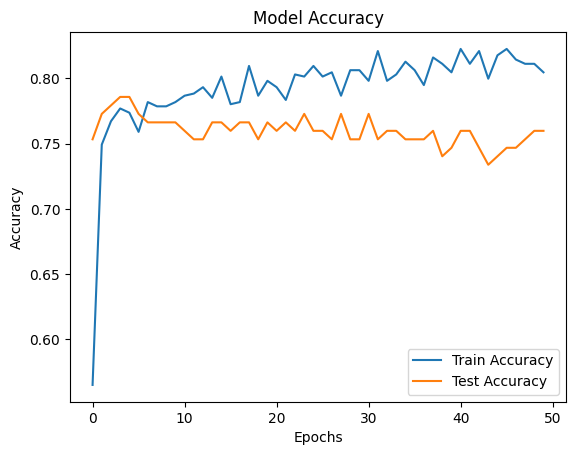

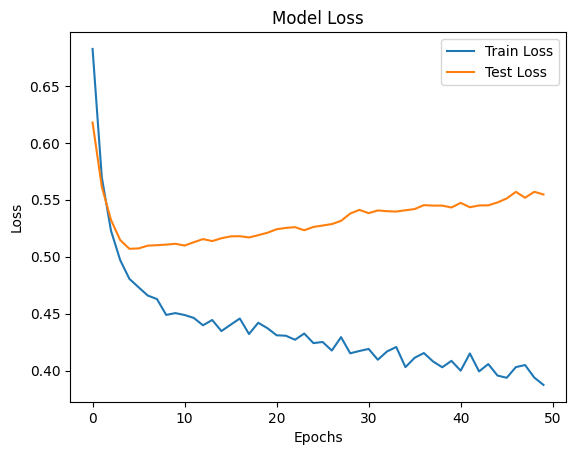

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import models, layers

# Assuming `data` is already loaded and contains your dataset
# Split data into features and labels
X = data.drop('Outcome', axis=1)  # All columns except 'Outcome'
y = data['Outcome']  # Target column indicating diabetes or not

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data to have a mean of 0 and a standard deviation of 1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Create the deep learning model using Keras
model = models.Sequential()

# Input layer
model.add(layers.InputLayer(input_shape=(X_train.shape[1],)))

# Hidden layers
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))  # Dropout layer to reduce overfitting
model.add(layers.Dense(32, activation='relu'))

# Output layer (binary classification)
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc * 100:.2f}%")

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.5667 - loss: 0.6872 - val_accuracy: 0.6753 - val_loss: 0.6298
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7157 - loss: 0.6007 - val_accuracy: 0.7338 - val_loss: 0.5708
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7566 - loss: 0.5346 - val_accuracy: 0.7338 - val_loss: 0.5304
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7427 - loss: 0.5209 - val_accuracy: 0.7532 - val_loss: 0.5086
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.7587 - loss: 0.4920 - val_accuracy: 0.7727 - val_loss: 0.4976
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7719 - loss: 0.4663 - val_accuracy: 0.7792 - val_loss: 0.4950
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.7905 - loss: 0.4433 - val_accuracy: 0.7662 - val_loss: 0.4988
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7920 - loss: 0.4441 - val_accuracy: 0.7857 - val_

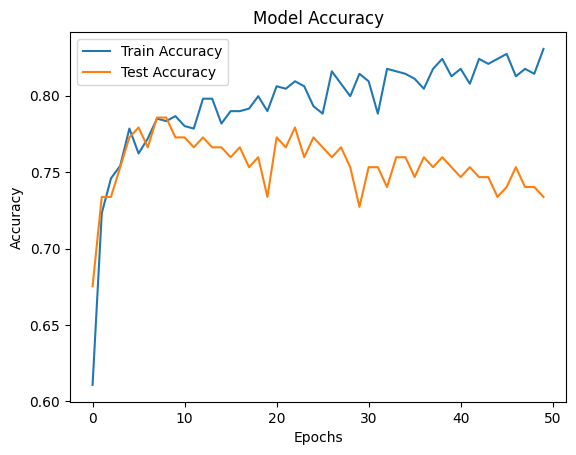

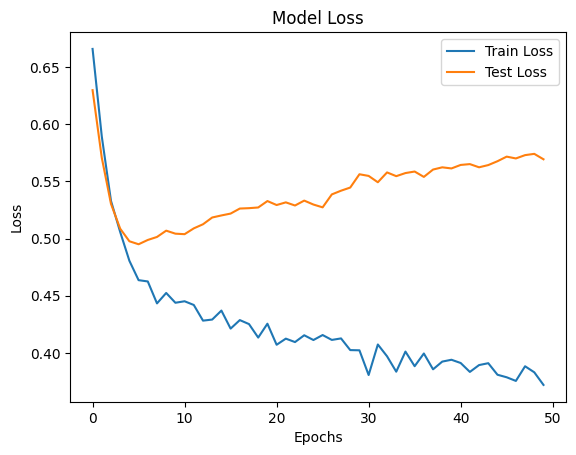

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import models, layers

# Sample dataset (Replace with actual data)
import pandas as pd
data = pd.read_csv("diabetes.csv")  # Ensure this file exists in your environment

# Split data into features and labels
X = data.drop('Outcome', axis=1)  # All columns except 'Outcome'
y = data['Outcome']  # Target column indicating diabetes or not

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data to have a mean of 0 and a standard deviation of 1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Create the deep learning model using Keras
model = models.Sequential([
    layers.InputLayer(input_shape=(X_train.shape[1],)),  # Input Layer
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),  # Dropout layer to reduce overfitting
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc * 100:.2f}%")

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Feature Names: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Saliency Map Shape: (8,)
Saliency Map Values: [0.05737049 0.07386205 0.03169409 0.00082515 0.03571766 0.20675428
 0.26083463 0.0886732 ]


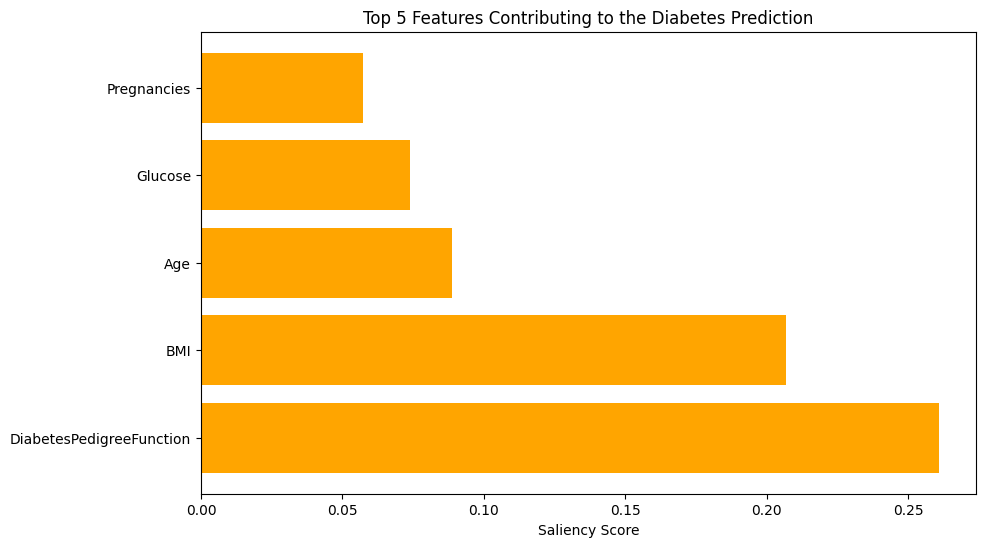

In [15]:
def compute_saliency_map(model, input_data):
    # Convert input data to tensor
    input_tensor = tf.convert_to_tensor(input_data, dtype=tf.float32)
    input_tensor = tf.expand_dims(input_tensor, axis=0)  # Add batch dimension

    # Compute gradients of the class output with respect to the input data
    with tf.GradientTape() as tape:
        tape.watch(input_tensor)
        predictions = model(input_tensor)
        class_output = predictions[:, 0]  # Get the score for 'diabetic' class

    # Get the gradients with respect to the input
    gradients = tape.gradient(class_output, input_tensor)

    # Ensure it's a 1D NumPy array (Fix issue)
    saliency = np.squeeze(tf.abs(gradients).numpy())

    return saliency



Feature Names: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Saliency Map Shape: (8,)
Saliency Map Values: [0.0118714  0.38637757 0.00390523 0.11093388 0.04621491 0.24633774
 0.1199414  0.47681117]


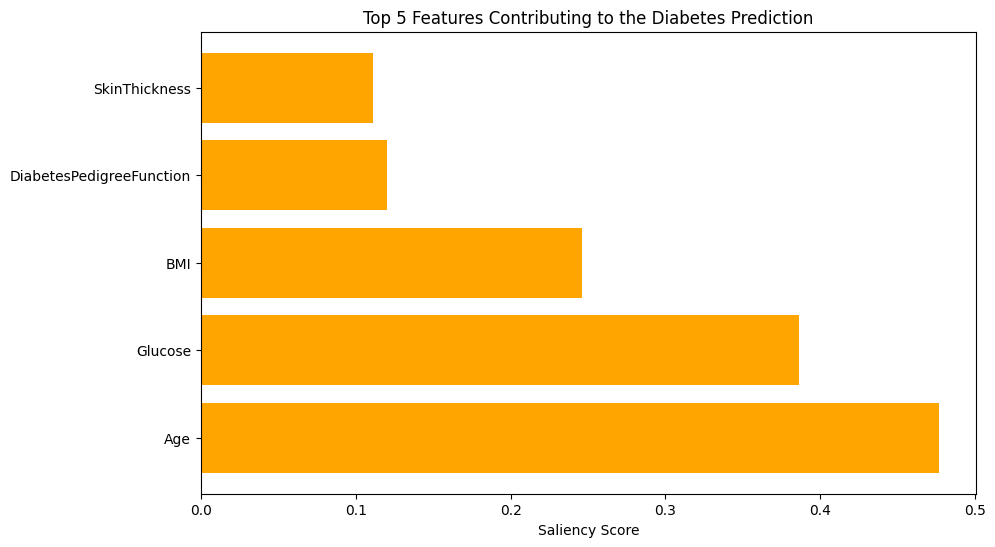

In [16]:

# Choose an instance from the test set
instance_idx = 12  # You can change this to test a different instance
instance = X_test[instance_idx]

# Compute the saliency map for this instance
saliency_map = compute_saliency_map(model, instance)

# **🛠 Debugging Prints**
print("Feature Names:", list(X.columns))
print("Saliency Map Shape:", saliency_map.shape)
print("Saliency Map Values:", saliency_map)

# **🚀 Ensure Saliency Map is 1D**
if saliency_map.ndim != 1:
    raise ValueError("Saliency map must be a 1D array!")

# Sort indices based on saliency scores
sorted_indices = np.argsort(saliency_map)[::-1]

# Ensure indices are valid before plotting
if max(sorted_indices[:5]) >= len(X.columns):
    raise IndexError("Index out of bounds in feature selection.")

# Plot the saliency map as a bar plot
plt.figure(figsize=(10, 6))
plt.barh([X.columns[i] for i in sorted_indices[:5]], saliency_map[sorted_indices[:5]], color='orange')
plt.xlabel('Saliency Score')
plt.title('Top 5 Features Contributing to the Diabetes Prediction')
plt.show()

# **✅ Fixes Applied**
# - Ensures `saliency_map` is a 1D array
# - Adds debugging prints to track issues
# - Checks for index errors before plotting